# Rosenbrock-like test function

#### 2-dimensional Rosenbrock function
$$f(x) = 100 (x_2 - x_1^2)^2 + (1 - x_1)^2 $$

Minimum at $[1, 1].$
Its gradient is $$\nabla f(x) = \left[\begin{array}{c} 400(x_1^2 - x_2)x_1 + 2(x_1 - 1) \\ 200 (x_2 - x_1^2) \end{array}\right]$$

Starting points for algorithms:
$$x^a = [0, 0]^T$$
$$x^b = [-1, -1]^T$$
$$x^c = [-0.9, -0.8]^T$$
$$x^d = [-0.9, 1.1]^T$$

#### Multi-dimensional bad function (by Nesterov)
$$f(x) = \frac{1}{4} (1 - x_1)^2 + \sum_{i=2}^{n} (x_{i} - 2x_{i-1}^2 + 1)^2, \;\; x \in \mathbb{R}^n$$

Take $n = 3,\ldots,6$.

$$x^a = [0, 0, \ldots, 0]^T$$
$$x^b = [-1, 1, \ldots, 1]^T$$
$$x^c = [-1, 0.9, \ldots, 0.9]^T$$

Question 1. Validate gradient of the Rosenbrock function numerically.

Substituting $x_1 = 1$ and $x_2 = 1$ in $\nabla f(x)$, both the components of the gradient become zero. The norm of the gradient is therefore zero in $[1, 1]$, and hence, we can expect a minimum, a maximum or a saddle point there. In order to decide, which of the three-listed cases corresponds to the point $[1,1]$, we have to compute Hess matrix

$$\ G(x) = \left[\begin{array}{c} 1200x_1^2 - 400x_2 + 2 & -400x_1 \\ -400x_1 & 200 \end{array}\right]$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def G(x):
    G = np.array([[1200 * x[0]**2 - 400 * x[1] + 2, -400 * x[1]], [-400 * x[1], 200]])
    return G

w, v = np.linalg.eig(G([1, 1]))
print(w)

[1.00160064e+03 3.99360767e-01]


We substitute $x_1 = 1$ and $x_2 = 1$ to G(x) and evaluate eigenvalues of Hess matrix using the function np.linalg.eig: $k_1 = 1001,6$ and $k_2 = 0,4.$ Both the eigenvalues are positive, Hess matrix is positive definite, and there is a minimum of Rosenbrock function in $[1,1].$

In [2]:
# 2D Rosenbrock function
def rosen2d(x):
    return rosen2d_XY(x[0], x[1])
# same, but accepts arrays (useful for plotting)
def rosen2d_XY(X, Y):
    return 100*(Y - X**2)**2 + (1 - X)**2

# Gradient of 2D Rosenbrock function
def rosen2d_grad(x):
    return np.array([400.0 * (x[0]**2 - x[1]) * x[0] + 2 * (x[0] - 1), 200 * (x[1] - x[0]**2)])

# N-dimensional function
def rosen_like_n(x):
    n = len(x)
    f = 1.0/4.0 * (1 - x[0])**2
    for i in range(1, n):
        f += (x[i] - 2.0 * x[i-1]**2 + 1)**2
    return f

def rosen_like_n_grad(x):
    n = len(x)
    A = np.array([1.0/2.0 * (x[0] - 1) + 8 * x[0] * (2 * x[0]**2 - x[1] - 1)])
    f = 0
    for i in range(1, n-1):
        f = 2 * (x[i] - 2 * x[i-1]**2 + 1) + 8 * x[i] * (2 * x[i]**2 - x[i+1] - 1) 
        A = np.append(A, [f])
    A = np.append(A, [2 * (x[n] - 2 * x[n-1]**2 + 1)])
    return A

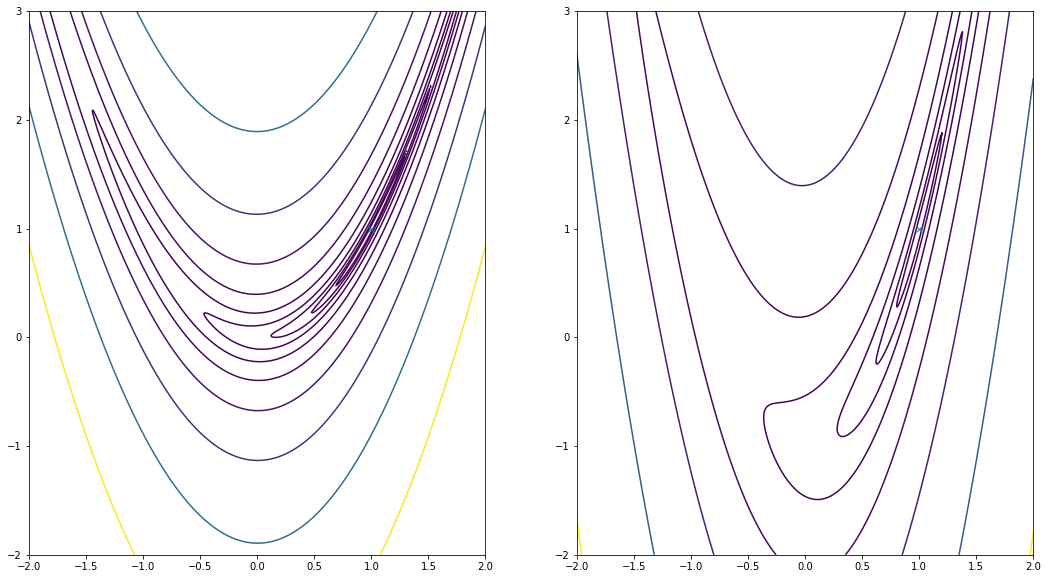

In [3]:
_, axes = plt.subplots(1,2,figsize=(18, 10))

# plot Rosenbrock contours
X, Y = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 3, 400))
Z_rosen = rosen2d_XY(X, Y)
axes[0].plot([1], [1], 'x')
axes[0].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))

# plot Nesterov's function contours
Z_nest2 = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z_nest2[i,j] = rosen_like_n([X[i,j], Y[i,j]])
axes[1].plot([1], [1], 'x')
axes[1].contour(X, Y, Z_nest2, np.logspace(-2, 3, 10))


In [4]:
# initial points (2D)
x_a = np.array([0, 0])
x_b = np.array([-1, -1])
x_c = np.array([-0.9, -0.8])
x_d = np.array([-0.9, 1.1])

In [5]:
def armijo(f, gradf, x, gradient):
    alpha = 1
    rho = 0.1
    step_factor = 0.5
    while(True):
        if f(x + alpha * gradient) <= f(x) + rho * alpha * np.dot(gradf(x), gradient):
            return alpha
        alpha = alpha * step_factor

def GradientDescent(f, gradf, x0, epsilon, num_iter, line_search):
    x = x0.copy()
    iteration = 0
    x_array = [x]
    f_array = [ f(x) ]
    while True:
        gradient = gradf(x)
        alpha = line_search(f, gradf, x, -gradient)
        x = x - alpha * gradient
        x_array += [ x ]
        f_array += [ f(x) ]
        iteration += 1
        
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    print('{} iterations is taken, f(x^k) = {}'.format(iteration, f_array[-1]))
    return {'x_k' : x_array, 'f_k' : f_array}

Case 1. gradient descent, step-size chosen by Armijo rule (initial points $x_a, x_b$)

10000 iterations is taken, f(x^k) = 5.996155305388497e-10
10000 iterations is taken, f(x^k) = 1.3959619297282707e-09


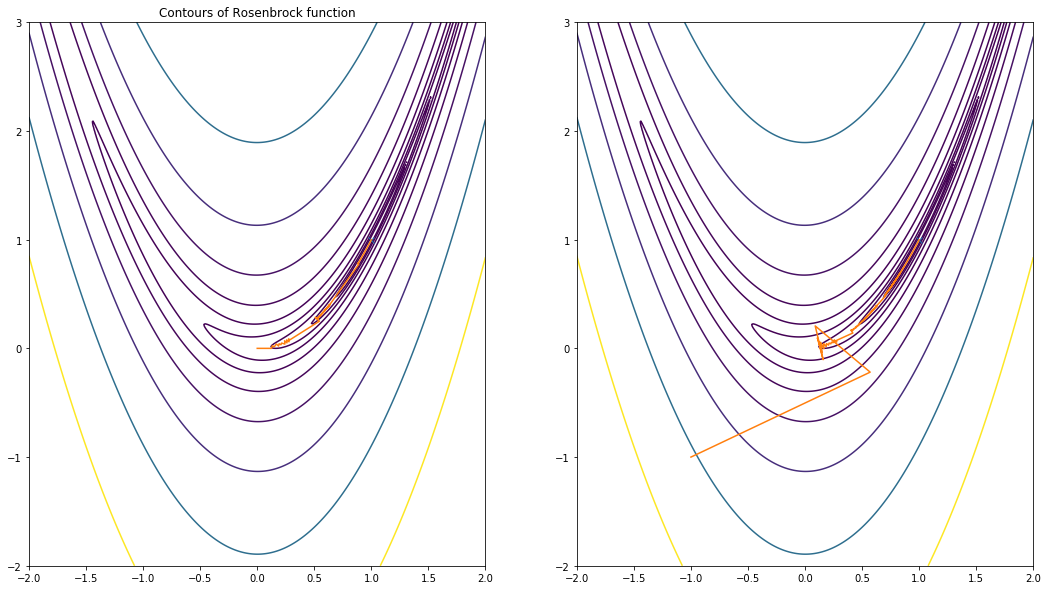

In [6]:
_, axes = plt.subplots(1,2,figsize=(18, 10))
for k in range(2):
    axes[k].plot([1], [1], 'x')
    axes[k].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))


alg_data = GradientDescent(rosen2d, rosen2d_grad, x_a, 1e-7, 10000, armijo)
x_data = np.array(alg_data['x_k'])
axes[0].set_title('Contours of Rosenbrock function')
axes[0].plot(x_data[:, 0], x_data[:, 1],)

alg_data = GradientDescent(rosen2d, rosen2d_grad, x_b, 1e-7, 10000, armijo)
x_data = np.array(alg_data['x_k'])
axes[0].set_title('Contours of Rosenbrock function')
axes[1].plot(x_data[:, 0], x_data[:, 1],)

Case 1. gradient descent, step-size chosen by Armijo rule (initial points $x_c, x_d$)

10000 iterations is taken, f(x^k) = 1.359920549035574e-09
10000 iterations is taken, f(x^k) = 1.4830396749156181e-10


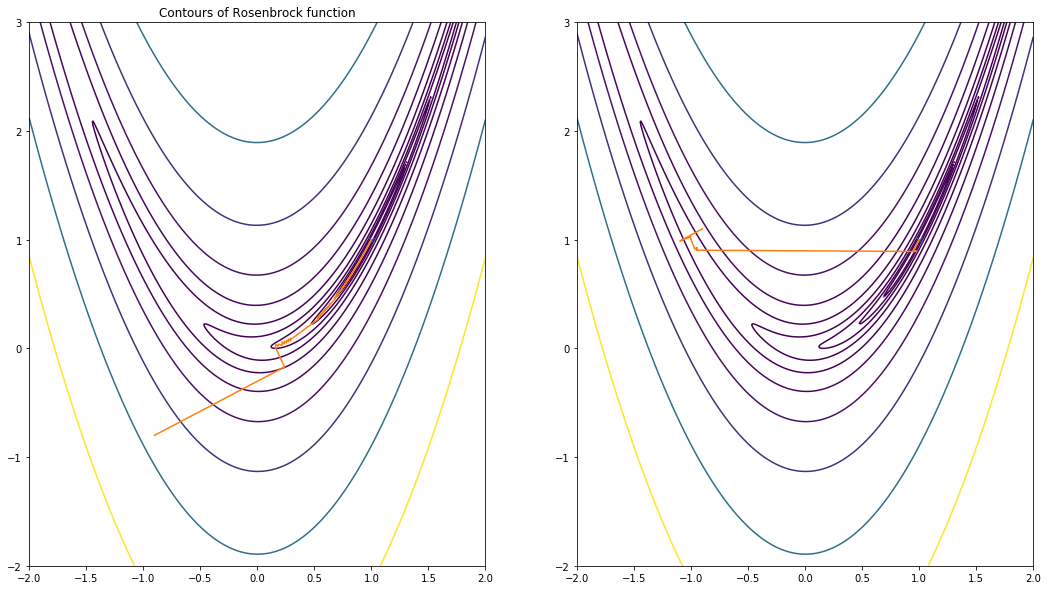

In [7]:
_, axes = plt.subplots(1,2,figsize=(18, 10))
for k in range(2):
    axes[k].plot([1], [1], 'x')
    axes[k].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))

alg_data = GradientDescent(rosen2d, rosen2d_grad, x_c, 1e-7, 10000, armijo)
x_data = np.array(alg_data['x_k'])
axes[0].set_title('Contours of Rosenbrock function')
axes[0].plot(x_data[:, 0], x_data[:, 1],)

alg_data = GradientDescent(rosen2d, rosen2d_grad, x_d, 1e-7, 10000, armijo)
x_data = np.array(alg_data['x_k'])
axes[0].set_title('Contours of Rosenbrock function')
axes[1].plot(x_data[:, 0], x_data[:, 1],)

In [8]:
def CoordinateDescent(f, gradf, x0, epsilon, num_iter, line_search):
    x = np.array(x0)
    iteration = 0
    endflag = False
    x_array = [x]
    f_prev = f(x)
    f_array = [ f_prev ]
    eye = np.eye(len(x))
    while iteration < num_iter:
        for d in range(len(x)): 
            gradient = gradf(x)
            alpha = line_search(f, gradf, x, -gradient)
            x = x - alpha*gradient[d]*eye[d]
            f_cur = f(x)
            x_array.append(x)
            f_array.append(f_cur)
            

        if abs(f_cur-f_prev) < epsilon:
            break
        if iteration >= num_iter:
            break
        f_prev = f_cur
        iteration += 1
    print('{} iterations is taken, f(x^k) = {}'.format(iteration, f_array[-1]))
    return {'x_k' : x_array, 'f_k' : f_array}

Case 2. coordinate descent, step-size chosen by Armijo rule (initial points $x_a, x_b$)

289 iterations is taken, f(x^k) = 4.9718782551777557e-05
526 iterations is taken, f(x^k) = 4.665616614189283e-05


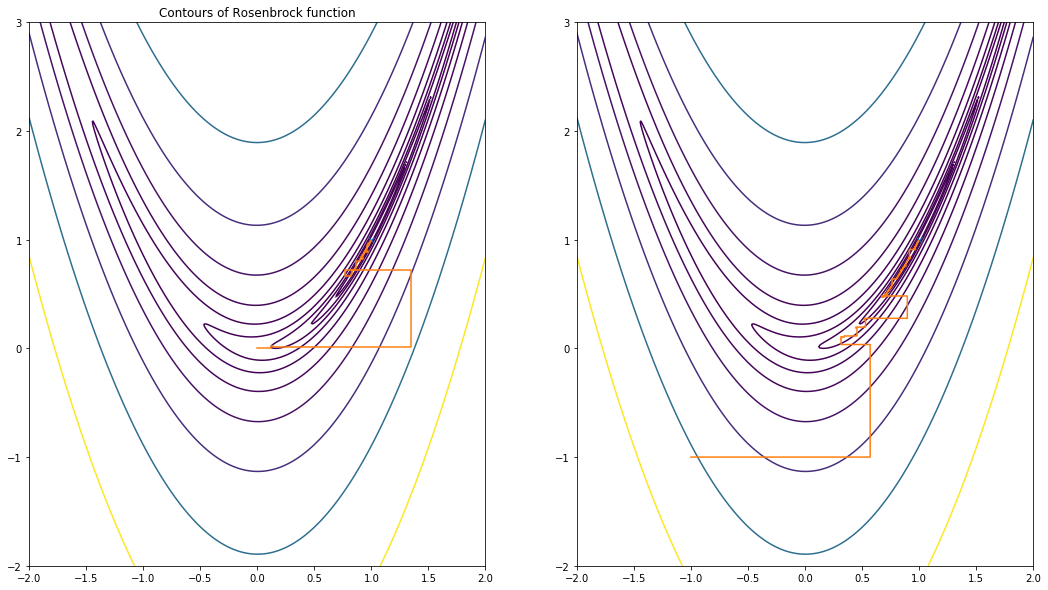

In [9]:
_, axes = plt.subplots(1,2,figsize=(18, 10))
for k in range(2):
    axes[k].plot([1], [1], 'x')
    axes[k].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))


alg_data = CoordinateDescent(rosen2d, rosen2d_grad, x_a, 1e-7, 10000, armijo)
x_data = np.array(alg_data['x_k'])
axes[0].set_title('Contours of Rosenbrock function')
axes[0].plot(x_data[:, 0], x_data[:, 1],)

alg_data = CoordinateDescent(rosen2d, rosen2d_grad, x_b, 1e-7, 10000, armijo)
x_data = np.array(alg_data['x_k'])
axes[0].set_title('Contours of Rosenbrock function')
axes[1].plot(x_data[:, 0], x_data[:, 1],)

Case 2. coordinate descent, step-size chosen by Armijo rule (initial points $x_c, x_d$)

260 iterations is taken, f(x^k) = 5.4656215799807914e-05
314 iterations is taken, f(x^k) = 2.5470124839374554e-05


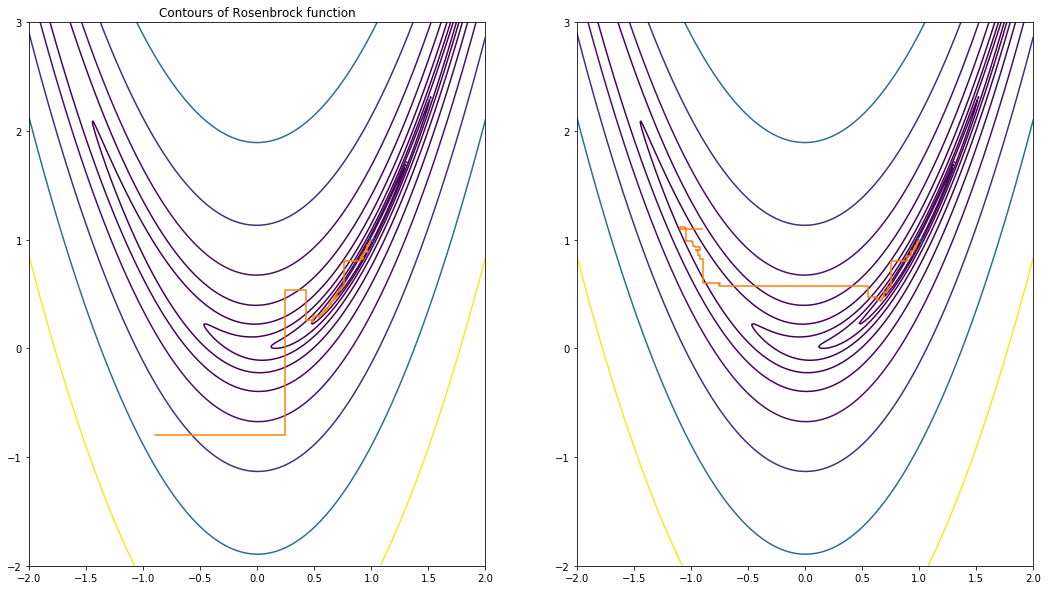

In [10]:
_, axes = plt.subplots(1,2,figsize=(18, 10))
for k in range(2):
    axes[k].plot([1], [1], 'x')
    axes[k].contour(X, Y, Z_rosen, np.logspace(-1, 3, 10))

alg_data = CoordinateDescent(rosen2d, rosen2d_grad, x_c, 1e-7, 10000, armijo)
x_data = np.array(alg_data['x_k'])
axes[0].set_title('Contours of Rosenbrock function')
axes[0].plot(x_data[:, 0], x_data[:, 1],)

alg_data = CoordinateDescent(rosen2d, rosen2d_grad, x_d, 1e-7, 10000, armijo)
x_data = np.array(alg_data['x_k'])
axes[0].set_title('Contours of Rosenbrock function')
axes[1].plot(x_data[:, 0], x_data[:, 1],)